# Pandas

## Data structures

### $\texttt{Series}$

In [1]:
from pandas import Series
import pandas as pd
import numpy as np

The simplest way to build a Series is from a 1D data array

In [2]:
obj = Series( [4, 7, -5, 3] )
obj

0    4
1    7
2   -5
3    3
dtype: int64

The pretty printing of a Series object shows the indices in the left column and the data values in the right column. Since we did not specify any particular index values, a default one is created as $range(len(a))$.

We can extract the indices and the data separately:

In [3]:
obj.index, obj.values

(RangeIndex(start=0, stop=4, step=1), array([ 4,  7, -5,  3]))

It is often necessary to build a Series object specifying a particular set of indices:

In [4]:
obj2 = Series( [4, 7, -5, 3], index=['d', 'b', 'a', 'c'] )
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [5]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='str')

If we compare a Series to a NumPy ndarray, the Series allows to select data through their indices:

In [6]:
obj2['a']

np.int64(-5)

In [7]:
obj2['d'] = 6
obj2[ ['c', 'a', 'd'] ] # Fancy indexing is supported

c    3
a   -5
d    6
dtype: int64

NumPy features such as boolean indexing, scalar multiplication, or ufunc application preserves the index-data pairs:

In [8]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [10]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [11]:
np.exp( obj2 )

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

A Series is very similar to a dictionary. It supports the $in$ operator to determine whether it contains a particular index:

In [12]:
'b' in obj2

True

In [13]:
'e' in obj2

False

We can create a Series from a dictionary:

In [14]:
sdata = { 'Caladan': 35000, 'Corrin': 71000, 'Ix': 16000, 'Giedi Prime': 5000 }
obj3 = Series( sdata )
obj3

Caladan        35000
Corrin         71000
Ix             16000
Giedi Prime     5000
dtype: int64

Note that the indices of the Series have been sorted alphabetically. We can provide an array containing the new list of keys in the dictionary that should be used for building the Series object:

In [15]:
planets = [ 'Kaitain', 'Caladan', 'Ix', 'Corrin' ]
obj4 = Series( sdata, index=planets )
obj4

Kaitain        NaN
Caladan    35000.0
Ix         16000.0
Corrin     71000.0
dtype: float64

In this case the keys have not been sorted alphabetically, but the order specified in the array has been preserved. Given that the dictionary did not include a value for the key $'Kaitain'$, the index is present in the Series with an associated value of $NaN$. In Pandas, $NaN$ is used to mark unknown values. The isnull() and notnull() are provided to build boolean masks over unknown and known values, respectively:

In [16]:
pd.isnull(obj4)

Kaitain     True
Caladan    False
Ix         False
Corrin     False
dtype: bool

In [17]:
pd.notnull(obj4)

Kaitain    False
Caladan     True
Ix          True
Corrin      True
dtype: bool

These are also available as a class method of Series:

In [18]:
obj4.isnull()

Kaitain     True
Caladan    False
Ix         False
Corrin     False
dtype: bool

A fundamental trait of Series is that the indices are automatically aligned when performing arithmetic:

In [19]:
obj3

Caladan        35000
Corrin         71000
Ix             16000
Giedi Prime     5000
dtype: int64

In [20]:
obj4

Kaitain        NaN
Caladan    35000.0
Ix         16000.0
Corrin     71000.0
dtype: float64

Both the Series and its index have a $name$ attribute, a name wich allows to align indices and data when working with higher dimensionality objects (such as DataFrame):

In [21]:
obj4.name = u'population'
obj4.index.name = u'planet'
obj4

planet
Kaitain        NaN
Caladan    35000.0
Ix         16000.0
Corrin     71000.0
Name: population, dtype: float64

The index of a Series can be modified without creating a new Series object:

In [22]:
obj.index = ['Joe', 'Jane', 'Mary', 'John']
obj

Joe     4
Jane    7
Mary   -5
John    3
dtype: int64

### $\texttt{DataFrame}$

In [23]:
from pandas import DataFrame

A common way to build a DataFrame is from a diccionary of lists of the same length:

In [24]:
data = { 'region': [ 'Galicia', 'Galicia', 'Galicia', 'Asturias', 'Asturias' ],
         'year': [2000, 2001, 2002, 2001, 2002],
         'population': [2731900, 2732926, 2737370, 1075329, 1073971] }
frame = DataFrame(data)
frame

,region,year,population
0,Galicia,2000,2731900
1,Galicia,2001,2732926
2,Galicia,2002,2737370
3,Asturias,2001,1075329
4,Asturias,2002,1073971


The new DataFrame has been asigned an index automatically, same as with Series, and the columns have been sorted alphabetically. We can specify a sequence of columns, and in that case the order will be preserved:

In [25]:
DataFrame( data, columns=['population', 'region', 'year'] )

,population,region,year
0,2731900,Galicia,2000
1,2732926,Galicia,2001
2,2737370,Galicia,2002
3,1075329,Asturias,2001
4,1073971,Asturias,2002


As with happened with Series, specifying a column not contained in $data$ will result in $NaN$ values:

In [26]:
frame2 = DataFrame( data, columns=['year', 'region', 'population', 'debt'], 
                          index=['one', 'two', 'three', 'four', 'five' ] )
frame2

,year,region,population,debt
one,2000,Galicia,2731900,NaN
two,2001,Galicia,2732926,NaN
three,2002,Galicia,2737370,NaN
four,2001,Asturias,1075329,NaN
five,2002,Asturias,1073971,NaN


In [27]:
frame2.columns

Index(['year', 'region', 'population', 'debt'], dtype='str')

A column can be extracted from a DataFrame as a Series, either using dictionary or attribute notation:

In [28]:
frame2['region']

one       Galicia
two       Galicia
three     Galicia
four     Asturias
five     Asturias
Name: region, dtype: str

In [29]:
frame2.region

one       Galicia
two       Galicia
three     Galicia
four     Asturias
five     Asturias
Name: region, dtype: str

The recovered Series preserves the DataFrame index, as well as its $name$ attribute. Using column names that are not valid variable names in Python (e.g., using accents) restricts this last possibility.

We can also recover DataFrame rows through their index, using the index attribute $loc$:

In [30]:
frame2.loc['three']

year             2002
region        Galicia
population    2737370
debt              NaN
Name: three, dtype: object

Data columns can be modified using simple assignments. For instance, we can assign a scalar value to the empty column $debt$:

In [31]:
frame2.debt = 3000
frame2

,year,region,population,debt
one,2000,Galicia,2731900,3000
two,2001,Galicia,2732926,3000
three,2002,Galicia,2737370,3000
four,2001,Asturias,1075329,3000
five,2002,Asturias,1073971,3000


In [32]:
frame2.debt = np.arange(5)
frame2

,year,region,population,debt
one,2000,Galicia,2731900,0
two,2001,Galicia,2732926,1
three,2002,Galicia,2737370,2
four,2001,Asturias,1075329,3
five,2002,Asturias,1073971,4


When assigning scalars, lists or arrays to a column, the rules of NumPy broadcasting apply. However, if we assign a Series, the assignment will be performed after aligning the indices, inserting $NaN$ for missing values. The indices in the Series which are not present in the DataFrame will be discarded:

In [33]:
val = Series( [-1.2, -1.5, -1.7, -1.9], index=['two', 'four', 'five', 'six'] )
frame2.debt = val
frame2

,year,region,population,debt
one,2000,Galicia,2731900,NaN
two,2001,Galicia,2732926,-1.2
three,2002,Galicia,2737370,NaN
four,2001,Asturias,1075329,-1.5
five,2002,Asturias,1073971,-1.7


Assigning a non-existing column will create a new one. The $del$ operator can be used to erase columns, same as when working with dictionaries:

In [34]:
frame2['election'] = False
frame2.election['two'] = True # View => changes are permanent
frame2.loc['three'].election = True # Copy => changes are not permanent
frame2

/tmp/ipykernel_426085/199147592.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment.
Such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#chained-assignment
  frame2.election['two'] = True # View => changes are permanent


,year,region,population,debt,election
one,2000,Galicia,2731900,NaN,False
two,2001,Galicia,2732926,-1.2,False
three,2002,Galicia,2737370,NaN,False
four,2001,Asturias,1075329,-1.5,False
five,2002,Asturias,1073971,-1.7,False


In [35]:
del frame2['election']
frame2

,year,region,population,debt
one,2000,Galicia,2731900,NaN
two,2001,Galicia,2732926,-1.2
three,2002,Galicia,2737370,NaN
four,2001,Asturias,1075329,-1.5
five,2002,Asturias,1073971,-1.7


In [36]:
frame2.columns

Index(['year', 'region', 'population', 'debt'], dtype='str')

Another common way to build a DataFrame is using a dictionary of nested dictionaries:

In [37]:
pop = { 'Asturias': { 2001: 1075329, 2002: 1073971 }, 'Galicia': { 2000: 2731900, 2001: 2732926, 2002: 2737370 } }
frame3 = DataFrame( pop )
frame3

,Asturias,Galicia
2001,1075329.0,2732926
2002,1073971.0,2737370
2000,NaN,2731900


Note that Pandas interprets the keys in the outer dictionary as columns, and those in the inner one as indices. We can transpose this:

In [38]:
frame3.T

,2001,2002,2000
Asturias,1075329.0,1073971.0,NaN
Galicia,2732926.0,2737370.0,2731900.0


A join operation on the keys of the inner dictionaries is applied, and the result sorted to build the final result. Otherwise, we can explicitly provide a sequence of indices:

In [39]:
DataFrame( pop, index=pd.Index([2001, 2002, 2003]) )

,Asturias,Galicia
2001,1075329.0,2732926.0
2002,1073971.0,2737370.0
2003,NaN,NaN


We can use as input dictionaries of Series, which are treated in the same way:

In [40]:
pdata = { 'Galicia': frame3['Galicia'][:-1], 'Asturias': frame3['Asturias'][:2] }
DataFrame( pdata )

,Galicia,Asturias
2001,2732926,1075329.0
2002,2737370,1073971.0


If we assign the $name$ attributes of indices and columns, these will be shown when pretty printing the object:

In [41]:
frame3.index.name = 'year'
frame3.columns.name = 'region'
frame3

region,Asturias,Galicia
year,,
2001,1075329.0,2732926
2002,1073971.0,2737370
2000,NaN,2731900


Same as with Series, the $values$ attribute returns the data contained in the DataFrame, although in this case the returned array is 2D:

In [42]:
frame3.values

array([[1075329., 2732926.],
       [1073971., 2737370.],
       [     nan, 2731900.]])

If the DataFrame columns have different data types, then the $dtype$ of the values array is chosen to be compatible with all of them:

In [43]:
frame2.values

array([[2000, 'Galicia', 2731900, nan],
       [2001, 'Galicia', 2732926, -1.2],
       [2002, 'Galicia', 2737370, nan],
       [2001, 'Asturias', 1075329, -1.5],
       [2002, 'Asturias', 1073971, -1.7]], dtype=object)

### $\texttt{Index}$

When an index array is used to build a Series or DataFrame, this is internally converted to an Index object:

In [44]:
obj = Series( range(3), index=['a', 'b', 'c'] )
index = obj.index
index

Index(['a', 'b', 'c'], dtype='str')

We can access the values in an Index object as we would those in a ndarray:

In [45]:
index[1:]

Index(['b', 'c'], dtype='str')

In [46]:
#index[1] = 'd' # Immutability
#---------------------------------------------------------------------------
#TypeError                                 Traceback (most recent call last)
#<ipython-input-48-29170e49056c> in <module>()
#----> 1 index[1] = 'd' # Immutability
#
#/usr/lib/python2.7/site-packages/pandas/core/index.pyc in __setitem__(self, key, value)
#    920 
#    921     def __setitem__(self, key, value):
#--> 922         raise TypeError("Indexes does not support mutable operations")
#    923 
#    924     def __getitem__(self, key):
#
#TypeError: Indexes does not support mutable operations

Index objects may be shared between different Series and DataFrame objects, providing an implicit relationship amongst them. They are immutable objects, thus guaranteeing referential integrity:

In [47]:
obj2 = Series( [1.5, -2.5, 0], index=index )
obj2.index is index

True

Same as with Series, an Index supports the $in$ operator:

In [48]:
2000 in frame3.index, 2003 in frame3.index

(True, False)

## Essential functions

### Reindexing

The $reindex()$ method of Series and DataFrame is used to build a new object with its data organized with respect to a new Index:

In [49]:
obj = Series( [4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'] )
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [50]:
obj2 = obj.reindex( ['a', 'b', 'c', 'd', 'e'] )
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

The data in the old object are sorted and new $NaN$ values are inserted as necessary. If we want to deal with unknown values in any other way, we can use the $fill_value$ parameter:

In [51]:
obj.reindex( ['a', 'b', 'c', 'd', 'e'], fill_value=0 )

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

When working with sorted data (e.g., time series) we may want to perform interpolation, or a smarter way of filling unknown values. The $method$ parameter allows to specify the filling method to use. Two different algorithms can be used: forward or backwards filling:

In [52]:
obj3 = Series( ['blue', 'purple', 'yellow'], index=[0,2,4] )
obj3

0      blue
2    purple
4    yellow
dtype: str

In [53]:
obj3.reindex( range(6), method='ffill' ) # Forward fill: fill with previous value

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: str

In [54]:
obj3.reindex( range(6), method='bfill' ) # Backwards fill: fill with next value

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: str

Working with DataFrame, reindex() can be used to change the index (default), the columns, or both:

In [55]:
frame = DataFrame( np.arange(9).reshape( (3, 3) ), index=['a', 'c', 'd'], columns=['Caladan', 'Corrin', 'Ix'] )
frame

,Caladan,Corrin,Ix
a,0,1,2
c,3,4,5
d,6,7,8


In [56]:
frame2 = frame.reindex( ['a', 'b', 'c', 'd'] )
frame2

,Caladan,Corrin,Ix
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


We can reindex the columns using the $columns$ parameter:

In [57]:
planets = ['Caladan', 'Giedi Prime', 'Ix']
frame.reindex( columns=planets )

,Caladan,Giedi Prime,Ix
a,0,NaN,2
c,3,NaN,5
d,6,NaN,8


We can simultaneously reindex rows and columns, although interpolating will only work over the rows:

In [58]:
frame.reindex( index=['a', 'b', 'c', 'd'], method='ffill', columns=planets )

,Caladan,Giedi Prime,Ix
a,0,1,2
b,0,1,2
c,3,4,5
d,6,7,8


### Removing elements over an axis

It is easy to remove elements from an axis if we have a sequence of indices to remove. In this case, the operation can be executed through reindex(). Otherwise, drop() can be used:

In [59]:
obj = Series( np.arange(5), index=['a', 'b', 'c', 'd', 'e'] )
obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [60]:
new_obj = obj.drop('c')
new_obj

a    0
b    1
d    3
e    4
dtype: int64

In [61]:
obj.drop( ['d', 'c'] )

a    0
b    1
e    4
dtype: int64

Working with DataFrame we can choose the axis over which to remove values:

In [62]:
data = DataFrame( np.arange(16).reshape((4,4)), index=['Ix', 'Caladan', 'Giedi Prime', 'Corrin'], 
                  columns=['one', 'two', 'three', 'four'] )
data

,one,two,three,four
Ix,0,1,2,3
Caladan,4,5,6,7
Giedi Prime,8,9,10,11
Corrin,12,13,14,15


In [63]:
data.drop( ['Caladan', 'Ix'] )

,one,two,three,four
Giedi Prime,8,9,10,11
Corrin,12,13,14,15


In [64]:
data.drop( 'two', axis=1 )

,one,three,four
Ix,0,2,3
Caladan,4,6,7
Giedi Prime,8,10,11
Corrin,12,14,15


In [65]:
data.drop( ['two', 'four'], axis=1 )

,one,three
Ix,0,2
Caladan,4,6
Giedi Prime,8,10
Corrin,12,14


### Indexing, selection, and filtering

Indexing Series objects is analogous to NumPy arrays. We can use a key value:

In [66]:
obj = Series( np.arange(4), index=['a', 'b', 'c', 'd'] )
obj

a    0
b    1
c    2
d    3
dtype: int64

In [67]:
obj['b']

np.int64(1)

We can use a positional slice, fancy indexing, or boolean indexing:

In [68]:
obj[2:4]

c    2
d    3
dtype: int64

In [69]:
obj[ ['b', 'a', 'd'] ]

b    1
a    0
d    3
dtype: int64

In [70]:
obj[obj < 2]

a    0
b    1
dtype: int64

Slicing over the index works in a slightly different way from NumPy arrays, as the end of the slice is inclusive:

In [71]:
obj['b':'c']

b    1
c    2
dtype: int64

We can modify the Series data using slice indexing:

In [72]:
obj['b':'c'] = 5
obj

a    0
b    5
c    5
d    3
dtype: int64

As we have seen before, indexing a DataFrame allows to extract one or more columns:

In [73]:
data = DataFrame( np.arange(16).reshape((4,4)), index=['Ix', 'Caladan', 'Giedi Prime', 'Corrin'],
                  columns=['one', 'two', 'three', 'four'] )
data

,one,two,three,four
Ix,0,1,2,3
Caladan,4,5,6,7
Giedi Prime,8,9,10,11
Corrin,12,13,14,15


In [74]:
data['two']

Ix              1
Caladan         5
Giedi Prime     9
Corrin         13
Name: two, dtype: int64

In [75]:
data[ ['three', 'one'] ]

,three,one
Ix,2,0
Caladan,6,4
Giedi Prime,10,8
Corrin,14,12


Slicing and boolean indexing work over the rows. Although this can strike as inconsistent, it is done for convenience reasons:

In [76]:
data[:2]

,one,two,three,four
Ix,0,1,2,3
Caladan,4,5,6,7


In [77]:
data[ data['three'] > 5 ]

,one,two,three,four
Caladan,4,5,6,7
Giedi Prime,8,9,10,11
Corrin,12,13,14,15


To get a DataFrame to behave as a NumPy array, indexing through a boolean DataFrame is also supported:

In [78]:
data < 5

,one,two,three,four
Ix,True,True,True,True
Caladan,True,False,False,False
Giedi Prime,False,False,False,False
Corrin,False,False,False,False


In [79]:
data[ data<5 ]

,one,two,three,four
Ix,0.0,1.0,2.0,3.0
Caladan,4.0,NaN,NaN,NaN
Giedi Prime,NaN,NaN,NaN,NaN
Corrin,NaN,NaN,NaN,NaN


In order to index using index labels we use the $loc$ attribute. It obtains a subset of rows and columns using NumPy notation. As previously mentioned, it can also be used to reindex the DataFrame:

In [80]:
data.loc['Caladan', ['two', 'three']]

two      5
three    6
Name: Caladan, dtype: int64

In [81]:
data.loc[ ['Caladan', 'Giedi Prime'], data.columns[[3,0,1]] ]

,four,one,two
Caladan,7,4,5
Giedi Prime,11,8,9


In [82]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Giedi Prime, dtype: int64

In [83]:
data.loc[ :'Giedi Prime', 'two' ]

Ix             1
Caladan        5
Giedi Prime    9
Name: two, dtype: int64

In [84]:
data.loc[ data.three > 5, data.columns[:3] ]

,one,two,three
Caladan,4,5,6
Giedi Prime,8,9,10
Corrin,12,13,14


### Arithmetic and data alignment

When operating on Pandas objects indices are taken into account, so that if any difference exists between the indices of the operands, the index of the resulting object will be the union of the original ones:

In [85]:
s1 = Series( [7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'] )
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [86]:
s2 = Series( [-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'] )
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [87]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

The internal index alignment performed by Pandas inserts $NaN$ values where appropriate. Unknown values are propagated when performing arithmetic operations. In the DataFrame case, the alignment is performed both over the rows and the columns of the object:

In [88]:
df1 = DataFrame( np.arange(9).reshape((3,3)), columns=list('bcd'), index=['Caladan', 'Ix', 'Corrin'] )
df1

,b,c,d
Caladan,0,1,2
Ix,3,4,5
Corrin,6,7,8


In [89]:
df2 = DataFrame( np.arange(12).reshape((4,3)), columns=list('bde'), index=['Giedi Prime', 'Caladan', 'Ix', 'Kaitain'] )
df2

,b,d,e
Giedi Prime,0,1,2
Caladan,3,4,5
Ix,6,7,8
Kaitain,9,10,11


In [90]:
df1 + df2

,b,c,d,e
Caladan,3.0,NaN,6.0,NaN
Corrin,NaN,NaN,NaN,NaN
Giedi Prime,NaN,NaN,NaN,NaN
Ix,9.0,NaN,12.0,NaN
Kaitain,NaN,NaN,NaN,NaN


Frequently we wish to fill unknown values not with $NaN$, but with different values. We can do so through the equivalent class methods, such as add():

In [91]:
df1.add( df2, fill_value=0 )

,b,c,d,e
Caladan,3.0,1.0,6.0,5.0
Corrin,6.0,7.0,8.0,NaN
Giedi Prime,0.0,NaN,1.0,2.0
Ix,9.0,4.0,12.0,8.0
Kaitain,9.0,NaN,10.0,11.0


Note that $NaN$ is still used for data which do not belong to any of the input objects.

Arithmetic between DataFrame and Series is well defined, and is performed by broadcasting the Series as necessary:

In [92]:
frame=df2.copy()
frame

,b,d,e
Giedi Prime,0,1,2
Caladan,3,4,5
Ix,6,7,8
Kaitain,9,10,11


In [93]:
series = frame.iloc[0]
series

b    0
d    1
e    2
Name: Giedi Prime, dtype: int64

By default, arithmetic operations between Series and DataFrame align the Series index over the DataFrame columns, and broadcasting over the rows:

In [94]:
frame - series

,b,d,e
Giedi Prime,0,0,0
Caladan,3,3,3
Ix,6,6,6
Kaitain,9,9,9


As when performing homogeneous arithmetic operations, the resulting index is the union of the input ones:

In [95]:
series2 = Series( range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [96]:
frame + series2

,b,d,e,f
Giedi Prime,0.0,NaN,3.0,NaN
Caladan,3.0,NaN,6.0,NaN
Ix,6.0,NaN,9.0,NaN
Kaitain,9.0,NaN,12.0,NaN


If the broadcasting of the Series should be performed over the DataFrame columns, we need to use class methods:

In [97]:
series3 = frame['d']
series3

Giedi Prime     1
Caladan         4
Ix              7
Kaitain        10
Name: d, dtype: int64

In [98]:
frame.sub(series3, axis=0)

,b,d,e
Giedi Prime,-1,0,1
Caladan,-1,0,1
Ix,-1,0,1
Kaitain,-1,0,1


The $axis$ parameter specifies the axis to align on.

### Functional application and mapping

NumPy ufuncs work with Pandas objects:

In [99]:
frame = DataFrame( np.random.randn(4, 3), columns=list('bde'), index=['Giedi Prime', 'Caladan', 'Ix', 'Kaitain'] )
frame

,b,d,e
Giedi Prime,1.134149,-0.215113,-0.351768
Caladan,-1.186210,0.373174,0.757725
Ix,0.823121,0.833039,-0.105445
Kaitain,-0.685551,0.737183,-0.983947


In [100]:
np.abs(frame)

,b,d,e
Giedi Prime,1.134149,0.215113,0.351768
Caladan,1.186210,0.373174,0.757725
Ix,0.823121,0.833039,0.105445
Kaitain,0.685551,0.737183,0.983947


We can apply a 1D function over the rows or columns of a table, using the apply() class method:

In [101]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.320359
d    1.048152
e    1.741672
dtype: float64

In [102]:
frame.apply(f, axis=1) # The axis= parameter marks the axis to reduce

Giedi Prime    1.485917
Caladan        1.943935
Ix             0.938484
Kaitain        1.721130
dtype: float64

Many of the most common statistics are implemented as class methods in DataFrame, so it is not required to explicitly call apply():

In [103]:
frame.mean()

b    0.021377
d    0.432071
e   -0.170859
dtype: float64

In [104]:
frame.mean(axis=1)

Giedi Prime    0.189089
Caladan       -0.018437
Ix             0.516905
Kaitain       -0.310772
dtype: float64

In [105]:
frame.std()

b    1.131234
d    0.474758
e    0.721200
dtype: float64

In [106]:
frame.sum()

b    0.085509
d    1.728283
e   -0.683435
dtype: float64

Functions passed to apply() need not return a scalar value. They may also return a Series with multiple values:

In [107]:
def f(x): return Series( [x.min(), x.max()], index=['min', 'max'] )
frame.apply(f)

,b,d,e
min,-1.186210,-0.215113,-0.983947
max,1.134149,0.833039,0.757725


Element-wise Python funtions can be applied using map():

In [108]:
format = lambda x: '%.2f' % x
frame.map( format )

,b,d,e
Giedi Prime,1.13,-0.22,-0.35
Caladan,-1.19,0.37,0.76
Ix,0.82,0.83,-0.11
Kaitain,-0.69,0.74,-0.98


Series does also have a $map()$ method which applies a function in an element-wise fashion:

In [109]:
frame['e'].map(format)

Giedi Prime    -0.35
Caladan         0.76
Ix             -0.11
Kaitain        -0.98
Name: e, dtype: str

### Sorting and ranking

Sorting a dataset is also natively supported by Pandas objects. In order to lexicographically sort by index or columns, returning a new object, sort_index() is provided:

In [110]:
obj = Series( range(4), index=list('dabc') )
obj

d    0
a    1
b    2
c    3
dtype: int64

In [111]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

When working with DataFrame we can specify the axis to sort:

In [112]:
frame = DataFrame( np.arange(8).reshape((2,4)), index=['one','three'], columns=list('dabc') )
frame

,d,a,b,c
one,0,1,2,3
three,4,5,6,7


In [113]:
frame.sort_index()

,d,a,b,c
one,0,1,2,3
three,4,5,6,7


In [114]:
frame.sort_index(axis=1)

,a,b,c,d
one,1,2,3,0
three,5,6,7,4


Ascending order is used by default, but this behavior can be changed through the $ascending$ parameter:

In [115]:
frame.sort_index( axis=1, ascending=False )

,d,c,b,a
one,0,3,2,1
three,4,7,6,5


To sort by data values, sort_values() is used:

In [116]:
obj = Series( [4, 7, -3, -2 ] )
obj

0    4
1    7
2   -3
3   -2
dtype: int64

In [117]:
obj.sort_values()

2   -3
3   -2
0    4
1    7
dtype: int64

Unknown values are placed at the end:

In [118]:
obj = Series( [4, np.nan, 7, np.nan, -3, 2] )
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [119]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

Working with DataFrame, we need to choose the column or set of columns that contain the values to sort. This can be done using the $by$ parameter of sort_values():

In [120]:
frame = DataFrame( {'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]} )
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [121]:
frame.sort_values( by='a' )

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


In [122]:
frame.sort_values( by='b' )

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [123]:
frame.sort_values( by=['a','b'] )

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ranking is related to sorting. It is the assignment of numerical values, from 1 to N, to each data point in the object. Series and DataFrame provide a rank() method implementing this operation. By default, ties are broken by assigning the mean value to each group:

In [124]:
obj = Series( [7, -5, 7, 4, 2, 0, 4] )
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [125]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

A new Series is returned sharing its index with the original one, but with values corresponding to the position each index would be placed on in a sorted version of the Series.

Ties can also be broken by making values observed first have a lower rank:

In [126]:
obj.rank( method='first' )

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

We can rank in descending order:

In [127]:
obj.rank( ascending=False, method="max" )

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

Working with DataFrame we can rank on rows or columns:

In [128]:
frame = DataFrame( {'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]} )
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [129]:
frame.rank()

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


In [130]:
frame.rank(axis=1)

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Indices with duplicated values

In all the previous examples, indices have always had unique values. Many Pandas functions (such as reindex()) require that this is the case, but it is not compulsory in the general case. Let us consider the following example:

In [131]:
obj = Series( range(5), index=list('aabbc') )
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [132]:
obj.index.is_unique

False

Selecting data is one of the main differences when working with duplicate indices, as a Series is returned, instead of a scalar value:

In [133]:
obj['a']

a    0
a    1
dtype: int64

In [134]:
obj['c']

np.int64(4)

The same logic applies to DataFrame:

In [135]:
df = DataFrame( np.random.randn( 4, 3 ), index=['a', 'a', 'b', 'b'] )
df

,0,1,2
a,0.183600,0.366581,0.474878
a,0.576945,0.761329,0.700909
b,-1.992880,0.728864,-0.242343
b,-0.875294,0.291072,0.513349


In [136]:
df.loc['b']

,0,1,2
b,-1.992880,0.728864,-0.242343
b,-0.875294,0.291072,0.513349


## Descriptive statistics

We have already seen how reduction functions work in Pandas:

In [137]:
df = DataFrame( [[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'], 
                columns=['one', 'two'] )
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [138]:
df.sum()

one    9.25
two   -5.80
dtype: float64

The $axis$ parameter specifies which axis to reduce over:

In [139]:
df.sum( axis=1 )

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

These functions ignore unknown values by default, except if the entire row/column consists of unknown values. This behavior can be deactivated using the $skipna$ parameter:

In [140]:
df.mean( axis=1, skipna=False )

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

Some methods return indirect descriptive values, such as idxmin() and idxmax(), which return the index at which the minimum and maximum values are located, respectively:

In [141]:
df.idxmin()

one    d
two    b
dtype: str

In [142]:
df.idxmax()

one    b
two    d
dtype: str

Other methods do not implement reductions, but a set of descriptive values:

In [143]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Used on non-numerical data, describe() provides relevant descriptive statistics:

In [144]:
obj = Series( ['a', 'a', 'b', 'c'] *4 )
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: str

In [145]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and covariance

Some statistics are computed from pairs of arguments. Let us consider several DataFrame containing stock prices and trade volumes obtained through Yahoo! Finance:

In [146]:
import yfinance as yf

In [147]:
all_data = {}
for ticker in ['TSLA', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = yf.Ticker( ticker ).history( start='2010-1-1', end='2015-3-31' )

price = DataFrame( {tic: data['Close'] for tic, data in all_data.items()} )
volume = DataFrame( {tic: data['Volume'] for tic, data in all_data.items()} )

returns = price.pct_change() # Intra-day earnings
returns.tail() # Returns last 5 values

,TSLA,IBM,MSFT,GOOG
Date,,,,
2015-03-24 00:00:00-04:00,0.010469,-0.009901,0.000933,0.020365
2015-03-25 00:00:00-04:00,-0.036784,-0.023313,-0.033566,-0.020002
2015-03-26 00:00:00-04:00,-0.020021,0.008731,-0.006030,-0.006469
2015-03-27 00:00:00-04:00,-0.028412,-0.001183,-0.005824,-0.012303
2015-03-30 00:00:00-04:00,0.030108,0.014152,-0.000244,0.006729


The Series.corr() method computes the correlation with a second Series provided as parameter, aligning both over their indices and ignoring unknown values. Series.cov() computes covariance in a similar way:

In [148]:
returns.MSFT.corr( returns.IBM )

np.float64(0.5016370082603796)

In [149]:
returns.MSFT.cov( returns.IBM )

np.float64(8.349371921461097e-05)

DataFrame.corr() and DataFrame.cov() return a full correlation or covariance matrix, respectively, as a DataFrame:

In [150]:
returns.corr()

,TSLA,IBM,MSFT,GOOG
TSLA,1.000000,0.211837,0.213196,0.240603
IBM,0.211837,1.000000,0.501637,0.399280
MSFT,0.213196,0.501637,1.000000,0.415153
GOOG,0.240603,0.399280,0.415153,1.000000


In [151]:
returns.cov()

,TSLA,IBM,MSFT,GOOG
TSLA,0.001289,0.000089,0.000108,0.000133
IBM,0.000089,0.000138,0.000083,0.000073
MSFT,0.000108,0.000083,0.000200,0.000092
GOOG,0.000133,0.000073,0.000092,0.000244


DataFrame.corrwith() computes the correlation of the columns in a frame with a Series or DataFrame provided as parameter. If a Series is provided, the correlation of each column with the Series is computed:

In [152]:
returns.corrwith( returns.IBM )

TSLA    0.211837
IBM     1.000000
MSFT    0.501637
GOOG    0.399280
dtype: float64

If a DataFrame is provided, it computes the correlation between the identically labeled columns:

In [153]:
returns.corrwith(volume)

TSLA    0.072970
IBM    -0.185389
MSFT   -0.120389
GOOG   -0.019607
dtype: float64

Using axis=1 would perform the calculation on the rows. In any case, data points are aligned using the index values before the computation.

### Unique values, value counts, and inclusion

A class of related methods extract information about the values and frequencies in Series. Series.unique() calculates the number of unique values:

In [154]:
obj = Series( list('cadaabbcc') )
uniques = obj.unique()
uniques

<ArrowStringArray>
['c', 'a', 'd', 'b']
Length: 4, dtype: str

Series.value_counts() computes the frequency of each value, and returns a sorted Series:

In [155]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

Lastly, Series.isin() computes set inclusion in a vectorized way:

In [156]:
mask = obj.isin( ['b', 'c'] )
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [157]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: str

Ocassionally we need to compute value counts to the columns of a DataFrame (e.g., to compute a histogram). That can be done using apply():

In [158]:
data = DataFrame( {'C1': [1, 3, 4, 3, 4],
                   'C2': [2, 3, 1, 2, 3],
                   'C3': [1, 5, 2, 4, 4]} )
data

,C1,C2,C3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


Now, we call apply with $axis=0$, indicating that we want to apply a function to each column in the DataFrame in isolation:

In [159]:
data.apply( lambda x: x.value_counts(), axis=0 ).fillna( 0 )

,C1,C2,C3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## Unknown data

### Filtering

The dropna() method returns a copy of the object after calling drop() for its unknown values:

In [160]:
data = Series( [1, np.nan, 3.5, None, 7] )
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [161]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

It is similar to using boolean indexing with notnull():

In [162]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

The problem gets more complicated with DataFrame. It is not possible to drop isolated data points, but only full rows or columns. By default, DataFrame.dropna() removes any row containing unknown values:

In [163]:
data = DataFrame( [[1, 6.5, 3], [1, np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3]] )
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [164]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


Passing $how="all"$ indicates that only rows containing unknown values only should be dropped:

In [165]:
data.dropna( how="all" )

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


As with other methods, $axis$ specifies whether the operation should be applied over the rows or the columns:

In [166]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [167]:
data.dropna( axis=1, how="all" )

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Lastly, dropna() allows to specify the number of unknown values required to drop a row or column using the $thresh$ parameter:

In [168]:
df = DataFrame( np.random.randn(7,3) )
df

,0,1,2
0,3.341857,0.752083,0.497894
1,-1.301570,-1.403393,0.697070
2,-0.827911,0.464583,-0.117060
3,1.174160,-1.048049,-0.655083
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


In [169]:
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,3.341857,NaN,NaN
1,-1.301570,NaN,NaN
2,-0.827911,NaN,-0.117060
3,1.174160,NaN,-0.655083
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


In [170]:
df.dropna( thresh=3 )

,0,1,2
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


### Filling unknown values

Instead of filtering unknown values, we can fill the voids in different ways. The fillna() function provides this functionality:

In [171]:
df.fillna(0)

,0,1,2
0,3.341857,0.000000,0.000000
1,-1.301570,0.000000,0.000000
2,-0.827911,0.000000,-0.117060
3,1.174160,0.000000,-0.655083
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


Passing a dictionary as parameter we can provided different fill values for different values:

In [172]:
df.fillna( {1: 0.5, 3: -1} )

,0,1,2
0,3.341857,0.500000,NaN
1,-1.301570,0.500000,NaN
2,-0.827911,0.500000,-0.117060
3,1.174160,0.500000,-0.655083
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


By default fillna() returns a new object, but the $inplace$ parameter can be used to modify the existing one:

In [173]:
df.fillna(0, inplace=True)
df

,0,1,2
0,3.341857,0.000000,0.000000
1,-1.301570,0.000000,0.000000
2,-0.827911,0.000000,-0.117060
3,1.174160,0.000000,-0.655083
4,2.031264,0.055016,-0.267202
5,0.169881,-0.204989,1.338766
6,0.197441,-0.384335,0.197335


Instead of providing an ad-hoc value, we can use the same interpolation methods in fillna():

In [174]:
df = DataFrame( np.random.randn(6, 3) )
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.165780,-0.351056,0.529851
1,0.432186,0.962167,0.087095
2,0.743519,NaN,0.071817
3,-0.703828,NaN,-1.602597
4,-0.905936,NaN,NaN
5,-0.317444,NaN,NaN


In [175]:
df.ffill()

,0,1,2
0,-0.165780,-0.351056,0.529851
1,0.432186,0.962167,0.087095
2,0.743519,0.962167,0.071817
3,-0.703828,0.962167,-1.602597
4,-0.905936,0.962167,-1.602597
5,-0.317444,0.962167,-1.602597


In [176]:
df.ffill( limit=2 )

,0,1,2
0,-0.165780,-0.351056,0.529851
1,0.432186,0.962167,0.087095
2,0.743519,0.962167,0.071817
3,-0.703828,0.962167,-1.602597
4,-0.905936,NaN,-1.602597
5,-0.317444,NaN,-1.602597


## Hierarchical indices

The simplest method to create a table with hierarchical indices is to pass nested lists as indices to the Series() or DataFrame() constructors:

In [177]:
data = Series( np.random.randn(10),
               index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]] )
data

a  1    0.404668
   2    1.147804
   3    0.717711
b  1   -1.678942
   2    0.957812
   3   -0.347438
c  1    0.712827
   2   -0.411669
d  2    1.282150
   3   -0.636546
dtype: float64

Now two different levels of indices exist. The numerical indices are located in a lower level with respect to the alphabetical indices. With this kind of objects we can use *partial indexing* to select subsets of data:

In [178]:
data['b']

1   -1.678942
2    0.957812
3   -0.347438
dtype: float64

In [179]:
data['b':'c']

b  1   -1.678942
   2    0.957812
   3   -0.347438
c  1    0.712827
   2   -0.411669
dtype: float64

In [180]:
data[['b','d']]

b  1   -1.678942
   2    0.957812
   3   -0.347438
d  2    1.282150
   3   -0.636546
dtype: float64

In [181]:
data[:,2]

a    1.147804
b    0.957812
c   -0.411669
d    1.282150
dtype: float64

We can "pivot" the Series, reorganizing the elements in a 2D table, using unstack():

In [182]:
data.unstack()

,1,2,3
a,0.404668,1.147804,0.717711
b,-1.678942,0.957812,-0.347438
c,0.712827,-0.411669,NaN
d,NaN,1.282150,-0.636546


The reverse operation is stack():

In [183]:
data.unstack().stack()

a  1    0.404668
   2    1.147804
   3    0.717711
b  1   -1.678942
   2    0.957812
   3   -0.347438
c  1    0.712827
   2   -0.411669
   3         NaN
d  1         NaN
   2    1.282150
   3   -0.636546
dtype: float64

We will explore these operations in more depth when we talk about cleaning and transforming data (wrangling).

Working with DataFrame, any of both axes can have hierarchical indices:

In [184]:
frame = DataFrame( np.arange(12).reshape((4,3)),
                   index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                   columns=[['Caladan', 'Caladan', 'Corrin'], ['Green', 'Red', 'Green']] )
frame

Caladan     Corrin
      Green Red  Green
a 1       0   1      2
  2       3   4      5
b 1       6   7      8
  2       9  10     11

Hierarhical levels can be named:

In [185]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['planet', 'color']
frame

planet    Caladan     Corrin
color       Green Red  Green
key1 key2                   
a    1          0   1      2
     2          3   4      5
b    1          6   7      8
     2          9  10     11

Partial indexing works over the columns, too:

In [186]:
frame['Caladan']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

We can create a MultiIndex object and use it when creating objects:

In [187]:
from pandas import MultiIndex

In [188]:
MultiIndex.from_arrays( [['Caladan', 'Caladan', 'Corrin'], ['Green', 'Red', 'Green']], names=['planet', 'color'] )

MultiIndex([('Caladan', 'Green'),
            ('Caladan',   'Red'),
            ( 'Corrin', 'Green')],
           names=['planet', 'color'])

### Sorting and reshaping hierarchical index levels

The swaplevel() method interchanges two index levels:

In [189]:
frame.swaplevel( 'key1', 'key2' )

planet    Caladan     Corrin
color       Green Red  Green
key2 key1                   
1    a          0   1      2
2    a          3   4      5
1    b          6   7      8
2    b          9  10     11

The $level$ parameter of sort_index() reorders data using the values of a single level. It is useful in combination with swaplevel() to guarantee that the results are lexicographically ordered:

In [190]:
frame.sort_index(level=1)

planet    Caladan     Corrin
color       Green Red  Green
key1 key2                   
a    1          0   1      2
b    1          6   7      8
a    2          3   4      5
b    2          9  10     11

In [191]:
frame.swaplevel(0,1).sort_index(level=0)

planet    Caladan     Corrin
color       Green Red  Green
key2 key1                   
1    a          0   1      2
     b          6   7      8
2    a          3   4      5
     b          9  10     11

Beyond aesthetics, selection operations on hierarchically indexed objects perform much better when working with lexicographically sorted indices.

### Using a DataFrame columns

It is often useful to use the columns of a DataFrame as an index over its rows. In other occasions, we wish to reshape data so that row indices are interpreted as columns:

In [192]:
frame = DataFrame( {'a': range(7), 'b': range(7,0,-1), 'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                    'd': [0, 1, 2, 0, 1, 2, 3]} )
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


The set_index() method creates a new DataFrame using one or more columns as indices:

In [193]:
frame2 = frame.set_index( ['c', 'd'] )
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

reset_index() performs the opposite operation: row indices are moved to the columns:

In [194]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Revisiting the bit.ly case study

It is trivial to create a DataFrame from the JSON records (dictionaries):

In [195]:
import json
json_file = open( "Files-04/usagov_bitly_data2013-05-17-1368832207" )
records = [json.loads(line) for line in json_file]
frame = DataFrame( records )
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...,US,0.0,America/Los_Angeles,CA,15r91,10OBm3W,pontifier,en-US,j.mp,direct,http://www.nsa.gov/,1.368832e+09,1.365701e+09,Anaheim,"[33.816101, -117.979401]",NaN,NaN
1,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,NaN,0.0,,NaN,ifIpBW,ifIpBW,bitly,en-us,1.usa.gov,http://www.usa.gov/,http://answers.usa.gov/system/selfservice.cont...,1.368832e+09,1.302189e+09,NaN,NaN,NaN,NaN
2,Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...,US,1.0,America/Phoenix,AZ,10DaxOu,10DaxOt,jaxstrong,"en-US,en;q=0.5",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.saj.usace.army.mil/Media/NewsReleas...,1.368832e+09,1.368815e+09,Fort Huachuca,"[31.5273, -110.360703]",NaN,NaN
3,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...,US,1.0,America/Chicago,TX,TysVFU,TChsoQ,o_5004fs3lvd,en-US,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,https://nationalregistry.fmcsa.dot.gov/,1.368832e+09,1.354719e+09,Houston,"[29.7633, -95.363297]",NaN,NaN
4,Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...,NaN,0.0,,NaN,10IGW7m,10IGW7l,peacecorps,en,1.usa.gov,http://t.co/CDO9hLTtNT,http://www.peacecorps.gov/learn/howvol/ab530gr...,1.368832e+09,1.368738e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,Mozilla/5.0 (Linux; U; Android 2.3.6; en-us; M...,US,1.0,America/Chicago,AL,10WWSaR,10WWSaQ,inws,en-US,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://inws.wrh.noaa.gov/weather/alertinfo/103...,1.368836e+09,1.368831e+09,Mobile,"[30.657499, -88.1586]",NaN,NaN
3955,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3)...,US,0.0,America/Chicago,WI,YmtpnZ,YmtpnZ,bitly,en-us,1.usa.gov,http://www.cudahy.k12.wi.us/,http://pld.dpi.wi.gov/files/pld/images/LinkWI.png,1.368836e+09,1.363712e+09,Brookfield,"[43.060799, -88.1558]",NaN,NaN
3956,ShortLinkTranslate,JP,0.0,Asia/Tokyo,14,YPnFn4,YPnFn3,hayano,NaN,1.usa.gov,direct,http://www.doe.gov/articles/energy-department-...,1.368836e+09,1.368833e+09,Tsukuba,"[36.083302, 140.116699]",NaN,NaN
3957,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_4 like ...,NaN,0.0,,NaN,17B6VoC,16n91ZK,nasatwitter,en-us,go.nasa.gov,http://t.co/XLS75r3BCB,http://www.jpl.nasa.gov/news/news.php?release=...,1.368836e+09,1.368747e+09,NaN,NaN,NaN,NaN


Timezones are stored in the $tz$ columns:

In [196]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: str

We can use value_counts() to directly obtain the timezone frequency:

In [197]:
frame['tz'].value_counts()

tz
America/New_York       903
America/Chicago        686
                       636
America/Los_Angeles    421
America/Puerto_Rico    184
                      ... 
Europe/Riga              1
Asia/Qatar               1
Asia/Phnom_Penh          1
Asia/Kuching             1
Europe/Sarajevo          1
Name: count, Length: 111, dtype: int64

We cna clean data to tell between records which have no timezone from those which have an empty string:

In [198]:
clean_tz = frame['tz'].fillna( 'N/A' )
clean_tz[ clean_tz == '' ] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts[:10]

tz
America/New_York        903
America/Chicago         686
Unknown                 636
America/Los_Angeles     421
America/Puerto_Rico     184
N/A                     120
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
Name: count, dtype: int64

We can plot the results directly from Pandas, without calling Matplotlib explicitly:

<Axes: ylabel='tz'>

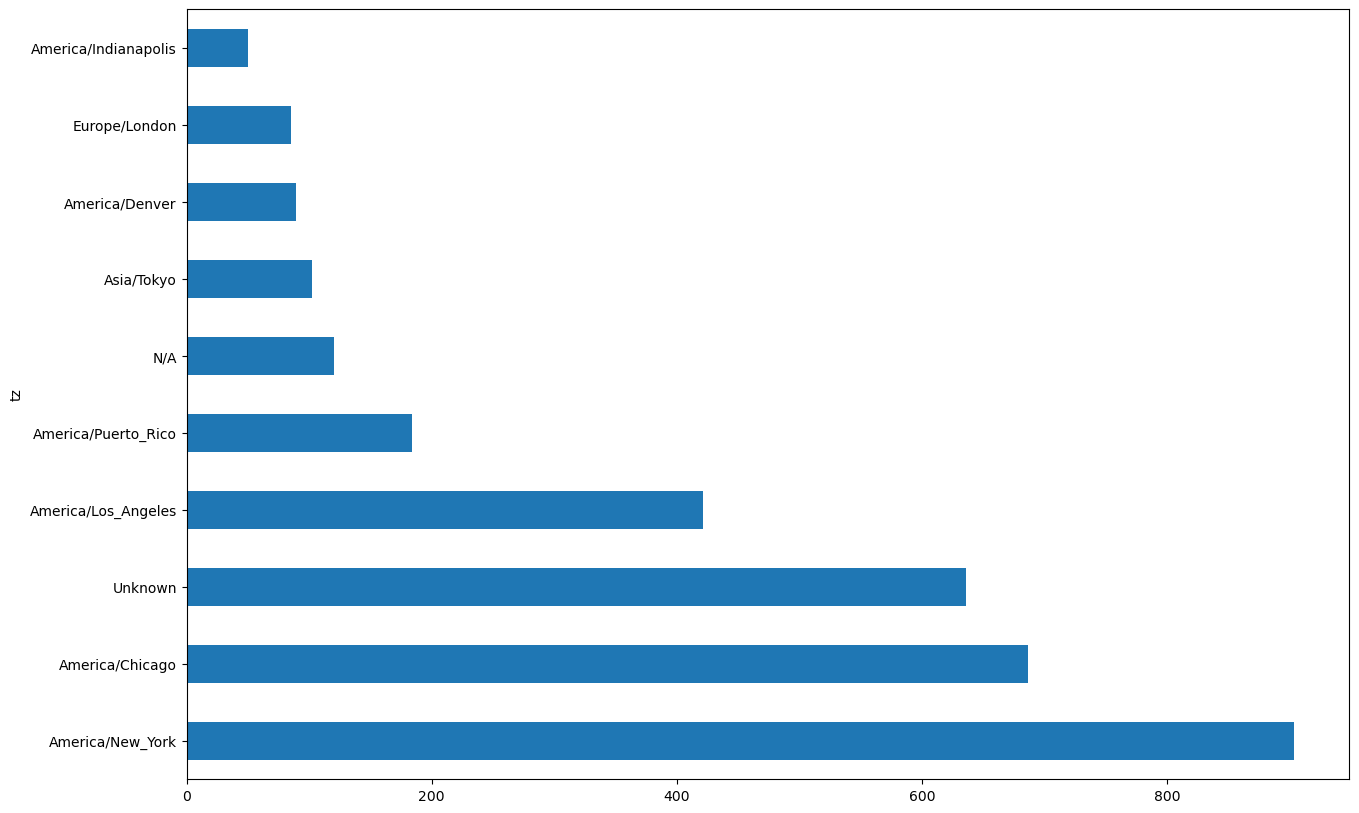

In [199]:
%matplotlib inline
tz_counts[:10].plot( kind='barh', rot=0, figsize=(15,10) )

We can analyze the available information about web browsers employed by the users (contained in the $a$ column):

In [200]:
frame['a'][:10]

0    Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...
1    Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...
2    Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...
3    Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...
4    Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...
5    Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
6    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) G...
7    Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_3_5 li...
8    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: str

At first glance it looks like a daunting task, but we can simplify the agent strings by extracting their first word (which corresponds, approximately, to the browser name and major version):

In [201]:
browsers = Series( [x.split()[0] for x in frame['a'].dropna()] )
browsers[:10]

0    Mozilla/5.0
1    Mozilla/4.0
2    Mozilla/5.0
3    Mozilla/5.0
4     Opera/9.80
5    Mozilla/5.0
6    Mozilla/5.0
7    Mozilla/5.0
8    Mozilla/5.0
9    Mozilla/5.0
dtype: str

In [202]:
browsers.value_counts()

Mozilla/5.0                                                         3251
Mozilla/4.0                                                          322
CakePHP                                                               38
ShortLinkTranslate                                                    36
TVersity                                                              30
Opera/9.80                                                            28
Dalvik/1.6.0                                                          19
Xenu                                                                  15
GoogleProducer;                                                       13
feedzirra                                                              8
iCoreService                                                           7
Android                                                                6
Dalvik/1.5.1                                                           4
Slurp                                              